In [8]:
pip install keras-tuner


     ------------------------------------ 129.1/129.1 kB 379.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

# Define paths to your datasets
train_dir = 'extracted_cats_dogs/training_set/training_set'  # Training data directory
test_dir = 'extracted_cats_dogs/test_set/test_set'            # Testing data directory


In [2]:
# Hyperparameters for dataset loading
BATCH_SIZE = 8  # Number of images per batch
NUM_TRAIN_IMAGES = 200  # Limit for training dataset
NUM_TEST_IMAGES = 50     # Limit for testing dataset
IMAGE_SIZE = (180, 180)  # Image dimensions

# Load the training dataset with a limited number of images
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 200 images from the training dataset
train_dataset = train_dataset.take(NUM_TRAIN_IMAGES // BATCH_SIZE + 1)  # Approximately 200 images

# Load the validation dataset from the training set
validation_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    validation_split=0.2,  # Use this to split for validation
    subset="validation",  # Create the validation dataset
    shuffle=True)

# Load the test dataset with a limited number of images
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 50 images from the test dataset
test_dataset = test_dataset.take(NUM_TEST_IMAGES // BATCH_SIZE + 1)  # Approximately 50 images


Found 8005 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


In [12]:
# Hyperparameters for model architecture
NUM_CLASSES = 2  # Number of classes (cats and dogs)
ACTIVATION_FUNCTION = 'relu'  # Activation function for layers
LEARNING_RATE = 0.001  # Learning rate for the optimizer
OPTIMIZER = 'adam'  # Optimizer to be used (e.g., 'adam', 'sgd')

# Define your model
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),  # Normalize pixel values
    keras.layers.Conv2D(128, 3, activation=ACTIVATION_FUNCTION),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation=ACTIVATION_FUNCTION),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=ACTIVATION_FUNCTION),
    keras.layers.Dense(NUM_CLASSES, activation='sigmoid')  # Change to the number of classes
])

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss='sparse_categorical_crossentropy',  # Use appropriate loss function
              metrics=['accuracy'])


BATCH_SIZE: Number of images per batch for training and testing.
NUM_TRAIN_IMAGES: The total number of images used for training.
NUM_TEST_IMAGES: The total number of images used for testing.
IMAGE_SIZE: Dimensions of the input images.
NUM_CLASSES: The number of output classes (for cats and dogs).
ACTIVATION_FUNCTION: The activation function used in the model layers.
LEARNING_RATE: Learning rate for the optimizer.
OPTIMIZER: Type of optimizer used for training the model.
EPOCHS: The number of epochs for training.

In [13]:
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]


In [14]:
# Hyperparameters for training
EPOCHS = 3  # Number of training epochs

# Fit the model with the updated datasets
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/3
26/26 [==============================] - 52s 2s/step - loss: 1.1441 - accuracy: 0.4952 - val_loss: 0.7062 - val_accuracy: 0.5141
Epoch 2/3
26/26 [==============================] - 53s 2s/step - loss: 0.6995 - accuracy: 0.5577 - val_loss: 0.6946 - val_accuracy: 0.4878
Epoch 3/3
26/26 [==============================] - 51s 2s/step - loss: 0.6926 - accuracy: 0.5577 - val_loss: 0.6927 - val_accuracy: 0.4922


In [6]:
# Optional: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")


7/7 [==============================] - 1s 134ms/step - loss: 1.6620 - accuracy: 0.5179
Test accuracy: 0.52


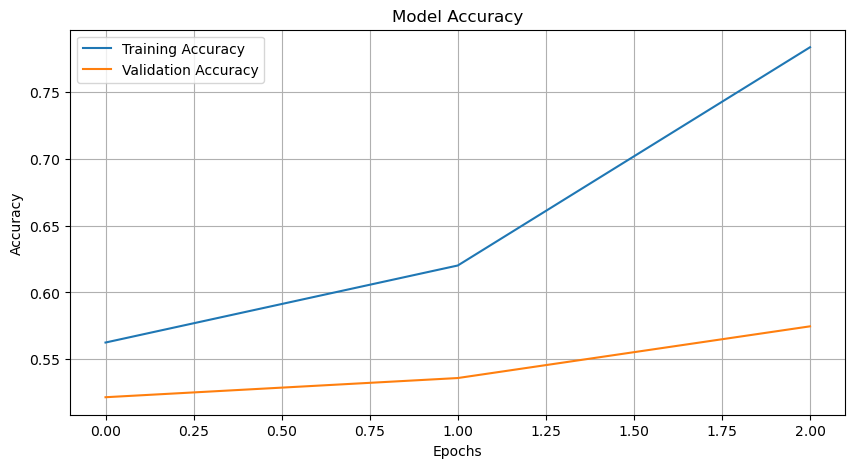

In [7]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Trial 10 Complete [00h 01m 38s]
val_accuracy: 0.5171767473220825

Best val_accuracy So Far: 0.585259199142456
Total elapsed time: 00h 19m 09s
Epoch 1/3
26/26 [==============================] - 43s 2s/step - loss: 0.9268 - accuracy: 0.5288 - val_loss: 0.6838 - val_accuracy: 0.5465
Epoch 2/3
26/26 [==============================] - 43s 2s/step - loss: 0.6485 - accuracy: 0.6587 - val_loss: 0.6687 - val_accuracy: 0.5934
Epoch 3/3
7/7 [==============================] - 1s 154ms/step - loss: 0.6983 - accuracy: 0.6429
Test accuracy: 0.64


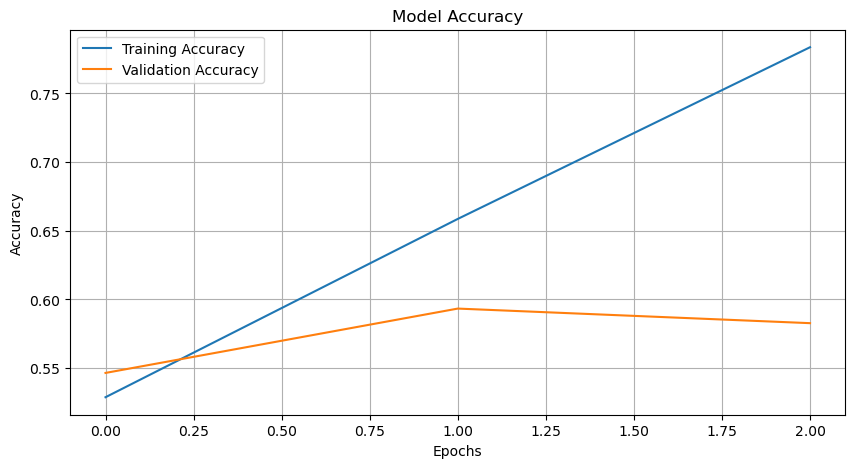

In [11]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import keras_tuner as kt  # Import Keras Tuner

# Define paths to your datasets
train_dir = 'extracted_cats_dogs/training_set/training_set'  # Training data directory
test_dir = 'extracted_cats_dogs/test_set/test_set'            # Testing data directory

# Hyperparameters for dataset loading
BATCH_SIZE = 8  # Number of images per batch
NUM_TRAIN_IMAGES = 200  # Limit for training dataset
NUM_TEST_IMAGES = 50     # Limit for testing dataset
IMAGE_SIZE = (180, 180)  # Image dimensions

# Load the training dataset with a limited number of images
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 200 images from the training dataset
train_dataset = train_dataset.take(NUM_TRAIN_IMAGES // BATCH_SIZE + 1)  # Approximately 200 images

# Load the validation dataset from the training set
validation_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    validation_split=0.2,  # Use this to split for validation
    subset="validation",  # Create the validation dataset
    shuffle=True)

# Load the test dataset with a limited number of images
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 50 images from the test dataset
test_dataset = test_dataset.take(NUM_TEST_IMAGES // BATCH_SIZE + 1)  # Approximately 50 images

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))

    # Tune the number of filters in the Conv2D layers
    for i in range(2):  # Two Conv2D layers
        model.add(keras.layers.Conv2D(
            filters=hp.Int('filters_' + str(i), min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size_' + str(i), values=[3, 5]),
            activation=hp.Choice('activation_' + str(i), values=['relu', 'linear'])
        ))
        model.add(keras.layers.MaxPooling2D())

    model.add(keras.layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('dense_activation', values=['relu', 'linear'])
    ))

    # Output layer
    model.add(keras.layers.Dense(NUM_CLASSES, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    optimizer = keras.optimizers.Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    )

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the Keras Tuner using Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='kt_dir',
    project_name='kt_bayesian_cats_dogs'
)

# Perform hyperparameter search
tuner.search(train_dataset, validation_data=validation_dataset, epochs=3)

# Get the optimal hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True)]
)

# Optional: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import keras_tuner as kt  # Import Keras Tuner

# Define paths to your datasets
train_dir = 'extracted_cats_dogs/training_set/training_set'  # Training data directory
test_dir = 'extracted_cats_dogs/test_set/test_set'            # Testing data directory

# Hyperparameters for dataset loading
BATCH_SIZE = 8  # Number of images per batch
NUM_TRAIN_IMAGES = 200  # Limit for training dataset
NUM_TEST_IMAGES = 50     # Limit for testing dataset
IMAGE_SIZE = (180, 180)  # Image dimensions

# Load the training dataset with a limited number of images
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 200 images from the training dataset
train_dataset = train_dataset.take(NUM_TRAIN_IMAGES // BATCH_SIZE + 1)  # Approximately 200 images

# Load the validation dataset from the training set
validation_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    validation_split=0.2,  # Use this to split for validation
    subset="validation",  # Create the validation dataset
    shuffle=True)

# Load the test dataset with a limited number of images
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',  # 'int' for integer labels
    seed=123,          # Seed for reproducibility
    shuffle=True)      # Shuffle to ensure random sampling

# Limit to the first 50 images from the test dataset
test_dataset = test_dataset.take(NUM_TEST_IMAGES // BATCH_SIZE + 1)  # Approximately 50 images

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))

    # Tune the number of filters in the Conv2D layers
    for i in range(2):  # Two Conv2D layers
        model.add(keras.layers.Conv2D(
            filters=hp.Int('filters_' + str(i), min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size_' + str(i), values=[3, 5]),
            activation=hp.Choice('activation_' + str(i), values=['relu', 'linear'])
        ))
        model.add(keras.layers.MaxPooling2D())

    model.add(keras.layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('dense_activation', values=['relu', 'linear'])
    ))

    # Output layer
    model.add(keras.layers.Dense(NUM_CLASSES, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    optimizer = keras.optimizers.Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    )

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the Keras Tuner using Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Max number of epochs to train for each trial
    factor=3,  # Factor by which the number of epochs is reduced in each bracket
    directory='kt_dir',
    project_name='kt_hyperband_cats_dogs'
)

# Perform hyperparameter search
tuner.search(train_dataset, validation_data=validation_dataset, epochs=3)

# Get the optimal hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(
    train_dataset,
    epochs=10,  # You can increase this if needed
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True)]
)

# Optional: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Trial 17 Complete [00h 04m 50s]
val_accuracy: 0.5871330499649048

Best val_accuracy So Far: 0.5871330499649048
Total elapsed time: 00h 29m 58s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
64                |128               |filters_0
5                 |3                 |kernel_size_0
relu              |relu              |activation_0
128               |32                |filters_1
5                 |5                 |kernel_size_1
relu              |relu              |activation_1
64                |64                |units
relu              |relu              |dense_activation
0.00048166        |0.00017996        |learning_rate
10                |10                |tuner/epochs
4                 |4                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |2                 |tuner/round
0013              |0012              |tuner/trial_id

Epoch 5/10
26/26 [==============================] - ETA: 0

KeyboardInterrupt: 